In [ ]:
# !pip install timm==0.4.12

In [1]:
import torch
import torch.nn as nn
import timm
from torchvision import transforms as Transforms
import torch.nn.functional as F
import os

D:\Anaconda\envs\project2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# 定义模型
class SwinTransformer(nn.Module):
    def __init__(self, num_features=512):
        super(SwinTransformer, self).__init__()
        self.model = timm.create_model("swin_base_patch4_window7_224")
        self.num_features = num_features
        self.feat = nn.Linear(1024, num_features) if num_features > 0 else None # 1024是swin_base_patch4_window7_224的输出维度

    def forward(self, x):
        x = self.model.forward_features(x)
        if not self.feat is None:
            x = self.feat(x)
        return x


# 数据预处理
class Data_Processor(object):
    def __init__(self, height, width):
        self.height = height
        self.width = width
        self.transformer = Transforms.Compose(
            [
                Transforms.Resize((self.height, self.width)), 
                Transforms.ToTensor(), 
                Transforms.Normalize(
                    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
                ), 
            ]
        )

    def __call__(self, img):
        return self.transformer(img).unsqueeze(0)

In [3]:
# 实例化
data_processor = Data_Processor(height=224, width=224)
model = SwinTransformer(num_features=512).cuda()
model.eval()

SwinTransformer(
  (model): SwinTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
    )
    (layers): Sequential(
      (0): SwinTransformerStage(
        (downsample): Identity()
        (blocks): Sequential(
          (0): SwinTransformerBlock(
            (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (attn): WindowAttention(
              (qkv): Linear(in_features=128, out_features=384, bias=True)
              (attn_drop): Dropout(p=0.0, inplace=False)
              (proj): Linear(in_features=128, out_features=128, bias=True)
              (proj_drop): Dropout(p=0.0, inplace=False)
              (softmax): Softmax(dim=-1)
            )
            (drop_path1): Identity()
            (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
            (mlp): Mlp(
              (fc1): Linear(in_features=128, out_features=512

In [5]:
# 加载权重
weight_path = 'weights/swin_base_patch4_window7_224.pth'
weight = torch.load(weight_path)
model.load_state_dict(weight['state_dict'], strict=True)

RuntimeError: Error(s) in loading state_dict for SwinTransformer:
	Missing key(s) in state_dict: "model.layers.3.downsample.norm.weight", "model.layers.3.downsample.norm.bias", "model.layers.3.downsample.reduction.weight", "model.head.fc.weight", "model.head.fc.bias". 
	Unexpected key(s) in state_dict: "model.layers.0.downsample.reduction.weight", "model.layers.0.downsample.norm.weight", "model.layers.0.downsample.norm.bias", "model.layers.0.blocks.0.attn.relative_position_index", "model.layers.0.blocks.1.attn_mask", "model.layers.0.blocks.1.attn.relative_position_index", "model.layers.1.blocks.0.attn.relative_position_index", "model.layers.1.blocks.1.attn_mask", "model.layers.1.blocks.1.attn.relative_position_index", "model.layers.2.blocks.0.attn.relative_position_index", "model.layers.2.blocks.1.attn_mask", "model.layers.2.blocks.1.attn.relative_position_index", "model.layers.2.blocks.2.attn.relative_position_index", "model.layers.2.blocks.3.attn_mask", "model.layers.2.blocks.3.attn.relative_position_index", "model.layers.2.blocks.4.attn.relative_position_index", "model.layers.2.blocks.5.attn_mask", "model.layers.2.blocks.5.attn.relative_position_index", "model.layers.2.blocks.6.attn.relative_position_index", "model.layers.2.blocks.7.attn_mask", "model.layers.2.blocks.7.attn.relative_position_index", "model.layers.2.blocks.8.attn.relative_position_index", "model.layers.2.blocks.9.attn_mask", "model.layers.2.blocks.9.attn.relative_position_index", "model.layers.2.blocks.10.attn.relative_position_index", "model.layers.2.blocks.11.attn_mask", "model.layers.2.blocks.11.attn.relative_position_index", "model.layers.2.blocks.12.attn.relative_position_index", "model.layers.2.blocks.13.attn_mask", "model.layers.2.blocks.13.attn.relative_position_index", "model.layers.2.blocks.14.attn.relative_position_index", "model.layers.2.blocks.15.attn_mask", "model.layers.2.blocks.15.attn.relative_position_index", "model.layers.2.blocks.16.attn.relative_position_index", "model.layers.2.blocks.17.attn_mask", "model.layers.2.blocks.17.attn.relative_position_index", "model.layers.3.blocks.0.attn.relative_position_index", "model.layers.3.blocks.1.attn.relative_position_index", "model.head.weight", "model.head.bias". 
	size mismatch for model.layers.1.downsample.norm.weight: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for model.layers.1.downsample.norm.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for model.layers.1.downsample.reduction.weight: copying a param with shape torch.Size([512, 1024]) from checkpoint, the shape in current model is torch.Size([256, 512]).
	size mismatch for model.layers.2.downsample.norm.weight: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for model.layers.2.downsample.norm.bias: copying a param with shape torch.Size([2048]) from checkpoint, the shape in current model is torch.Size([1024]).
	size mismatch for model.layers.2.downsample.reduction.weight: copying a param with shape torch.Size([1024, 2048]) from checkpoint, the shape in current model is torch.Size([512, 1024]).

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
def getImgFeat(img_file):
    # PIL read image
    img = Image.open(img_file).convert("RGB")  # 读取图片，转换为RGB
    img = data_processor(img).cuda()  # 数据预处理
    feat = F.normalize(model(img), dim=1).cpu()  # 使用F.normalize对特征进行L2归一化
    return feat

In [16]:
image_pair_path = ['selected_imgs/cam1_10034_1229_188_1415_825.jpg', 'selected_imgs/cam1_4354_1164_0_1273_258.jpg']

with torch.no_grad():
    A_feat = getImgFeat(image_pair_path[0])
    B_feat = getImgFeat(image_pair_path[1])
print(A_feat.shape, B_feat.shape)

torch.Size([1, 512]) torch.Size([1, 512])


In [17]:
A_feat

tensor([[ 2.2906e-03,  4.9548e-02,  3.4257e-02, -6.0559e-02,  2.1184e-02,
          3.6509e-02, -1.2078e-02,  2.6584e-02,  7.5285e-02, -1.5291e-02,
          2.8938e-02, -6.7208e-02,  2.3045e-02, -1.1851e-02, -4.8169e-02,
         -7.6998e-03, -6.0498e-02, -4.0589e-02, -6.4625e-02, -1.3420e-02,
          5.2809e-03,  1.0579e-01, -7.0616e-02,  6.9248e-03,  6.0649e-03,
         -2.8191e-02, -5.7449e-02, -2.6632e-02, -1.4130e-02, -4.8548e-02,
         -9.4900e-03,  1.0241e-01,  4.9344e-02, -6.2296e-03,  2.5103e-03,
         -2.8978e-02,  2.5115e-03,  5.0599e-02,  1.2377e-02, -5.2961e-02,
          3.2460e-04, -6.0532e-02,  5.6897e-02, -2.7286e-02,  5.5276e-02,
         -6.2725e-02,  3.3495e-02,  2.6534e-02,  5.2185e-02,  3.9839e-02,
          2.7047e-02, -4.6605e-02,  4.4406e-02, -2.1948e-02, -4.4545e-02,
          2.8656e-02,  2.9263e-02,  3.9454e-02,  2.8189e-02, -2.2295e-02,
         -3.4041e-04,  5.0414e-02,  2.7919e-02,  5.4832e-02, -4.7075e-02,
          6.7760e-02, -2.3980e-02, -3.

$$ simlarity = A_{feat} * B_{feat} / (||A_{feat}|| * ||B_{feat}||) $$

In [18]:

# 计算余弦相似度
simlarity1 = A_feat.matmul(B_feat.transpose(1, 0)) 
# 或者
simlarity2 = torch.cosine_similarity(A_feat, B_feat, dim=1)

In [19]:
print(simlarity1, simlarity2)

tensor([[0.5504]]) tensor([0.5504])


simlarity1: 0.5504 


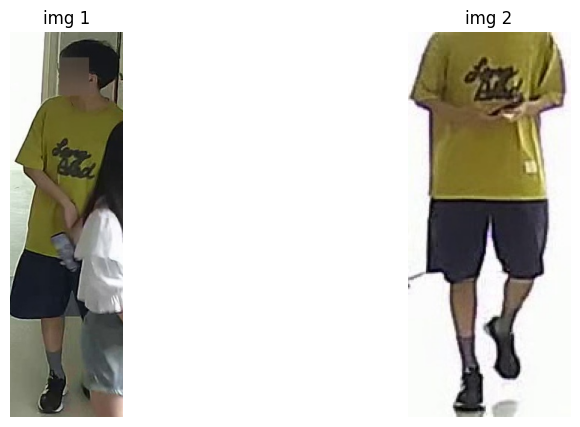

In [20]:
# use plt.subplot to show image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(image_pair_path[0])[:, :, ::-1])
plt.axis('off')
plt.title('img 1')
plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(image_pair_path[1])[:, :, ::-1])
plt.axis('off')
plt.title('img 2')
print(f"simlarity1: {simlarity1.item():.4f} ")
plt.show()

In [21]:
import os
import time
import glob
import tqdm
# 写入文件
import pickle

In [22]:
# check human_features.pickle exist
if not os.path.exists('human_features.pickle'):
    # 读取文件夹下所有图片
    imgs = glob.glob("./selected_imgs/*.jpg")
    person_feats = []
    for img in tqdm.tqdm(imgs):
        with torch.no_grad():
            feat = getImgFeat(img)
        person_feats.append(feat)

    human_feats = torch.cat(person_feats, 0) # 将所有特征拼接起来
    print(human_feats.shape)

    # 写入文件
    with open('human_features.pickle', "wb") as f:
        pickle.dump({'human_feats': human_feats, 'imgs': imgs}, f)


# 读取文件（如果再次运行，可以直接读取文件，不用再次计算特征）
with open('human_features.pickle', "rb") as f:
    data = pickle.load(f)
    human_feats = data['human_feats']
    imgs = data['imgs']

In [23]:
print(human_feats.shape, len(imgs))

torch.Size([1000, 512]) 1000


In [24]:
imgs[0]

'./selected_imgs\\cam1_10034_1229_188_1415_825.jpg'

In [34]:
# 测试
query_img = imgs[877]
# 计算query_img的特征
with torch.no_grad():
    feat_a = getImgFeat(query_img)
print(feat_a.shape)
# 和所有图片计算余弦相似度
A_similarity = feat_a.matmul(human_feats.transpose(1, 0))
# 获取相似度最高的topN张图片
topN = 8
# 获取相似度最高的topN张图片的索引
A_ranked_results = torch.argsort(A_similarity, descending=True)[0, :topN]
print(A_ranked_results)

torch.Size([1, 512])
tensor([877, 862, 860, 516, 523, 515, 522, 539])


In [35]:
# 打印对应的相似度
for i in range(topN):
    print(f"{A_similarity[0, A_ranked_results[i]].item():.4f}, ", end="")

1.0000, 0.9846, 0.9722, 0.8913, 0.8893, 0.8786, 0.8750, 0.8735, 

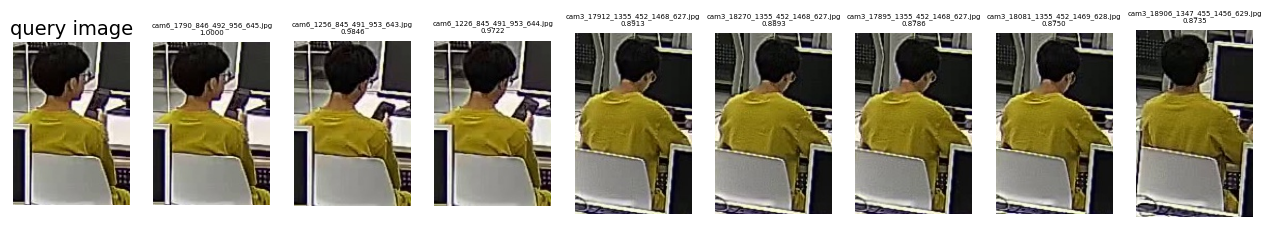

In [36]:
# 将query_img和topN张图片显示出来
fig, axes = plt.subplots(1, topN + 1, figsize = (2 * topN, 3)) # 1行，topN+1列
query_img_data = np.array(Image.open(query_img).convert('RGB')) # PIL读取图片，转换为RGB，resize为(64, 128)
plt.clf() 
ax = fig.add_subplot(1, topN + 1, 1) # 第一张图
ax.imshow(query_img_data) # 显示图片
ax.set_title('query image', fontsize=14)
ax.axis("off")

# 遍历显示topN张图片
for i in range(topN):
    ax = fig.add_subplot(1, topN + 1, i + 2)
    gallery_index = A_ranked_results[i]
    gallery_img = cv2.imread(imgs[gallery_index])[:, :, ::-1]
    ax.imshow(gallery_img)
    # set title: filename + similarity
    ax.set_title(f"{os.path.basename(imgs[gallery_index])}\n{A_similarity[0, gallery_index].item():.4f}", fontsize=5)
    ax.axis("off")


In [37]:
# 使用faiss向量库
import faiss

In [38]:
human_feats.shape

torch.Size([1000, 512])

In [39]:
# 将特征转换为numpy格式
human_feats_np = human_feats.numpy()
print(human_feats_np.shape)
# 创建索引，参数：特征维度512
index = faiss.IndexFlatIP(512)
# 添加数据
index.add(human_feats_np)
print(index.ntotal)
# save index
faiss.write_index(index, 'index_flat_ip.index')

(1000, 512)
1000


In [40]:
# read index
index = faiss.read_index('index_flat_ip.index')

In [46]:
# sanity check，即查询自己，应该是相似度最高的
topN = 10
# 参数：待查询的特征（可以是多个），查询的topN
# 这里的效果是查询human_feats_np前5张图片的topN，理应是自己
D, I = index.search(human_feats_np[:5] , topN)
# print(D.shape, I.shape)
print(I)
print(D)

[[  0  86  99  72  98  85  65  21  22 578]
 [  1 577 234 734 957 742 565 310 550 849]
 [  2  92  91  89  93  94   3 891 826 643]
 [  3   2  92  91  89  93  94 643 826 891]
 [  4   5  30   6  32  28  25  10  31  13]]
[[1.         0.9618367  0.90148216 0.90034556 0.90017015 0.899284
  0.8376201  0.83095837 0.78730994 0.7580116 ]
 [1.         0.7669809  0.7177556  0.6815016  0.6486006  0.6438439
  0.6073116  0.6026504  0.58459866 0.5543348 ]
 [1.         0.9333534  0.9282368  0.9181272  0.91751313 0.898314
  0.82986224 0.6477339  0.58536756 0.5840258 ]
 [1.         0.82986224 0.77992094 0.77453023 0.7306219  0.7092805
  0.6679317  0.5716667  0.5499676  0.51147896]
 [1.         0.9538971  0.83327323 0.80898213 0.7576946  0.7574228
  0.6595167  0.65248287 0.6461888  0.63120204]]


In [47]:
# 查询
query_img = imgs[877]
print(query_img)
with torch.no_grad():
    feat_a = getImgFeat(query_img)
feat_a_np = feat_a.numpy()

./selected_imgs\cam6_1790_846_492_956_645.jpg


In [48]:
# 查询相似度最高的topN张图片
topN = 8
D, I = index.search(feat_a_np, topN) # 默认使用的距离度量是内积，所以这里查询的是余弦相似度最高的topN张图片
print(D.shape, I.shape)
print(I)
print(D)


(1, 8) (1, 8)
[[877 862 860 516 523 515 522 539]]
[[1.        0.9845602 0.9721823 0.8913473 0.8893197 0.8786341 0.8750058
  0.873502 ]]


In [ ]:
# 与之前方法的结果进行对比
# tensor([877, 862, 860, 516, 523, 515, 522, 539])
# 1.0000, 0.9846, 0.9722, 0.8913, 0.8893, 0.8786, 0.8750, 0.8735, 

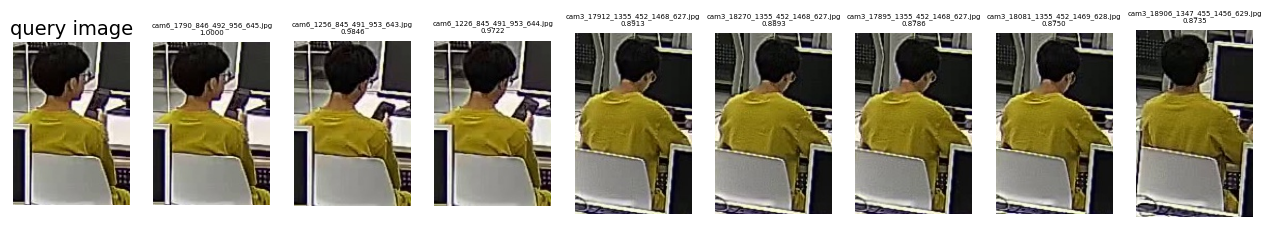

In [49]:
# 将query_img和topN张图片显示出来
fig, axes = plt.subplots(1, topN + 1, figsize = (2 * topN, 3)) # 2行，topN+1列
query_img_data = np.array(Image.open(query_img).convert('RGB')) # PIL读取图片，转换为RGB，resize为(64, 128)
plt.clf() 
ax = fig.add_subplot(1, topN + 1, 1) # 第一张图
ax.imshow(query_img_data) # 显示图片
ax.set_title('query image', fontsize=14)
ax.axis("off")

# 遍历显示topN张图片
for i in range(topN):
    ax = fig.add_subplot(1, topN + 1, i + 2)
    gallery_index = I[0, i]
    gallery_img = cv2.imread(imgs[gallery_index])[:, :, ::-1]
    ax.imshow(gallery_img)
    # set title: filename + similarity
    ax.set_title(f"{os.path.basename(imgs[gallery_index])}\n{D[0, i]:.4f}", fontsize=5)
    ax.axis("off")
    

In [52]:
# 范围查询：https://github.com/facebookresearch/faiss/wiki/Special-operations-on-indexes
# 查询相似度在0.8以上的图片
threshold = 0.8
lims, D, I = index.range_search(feat_a_np, threshold) 
print(lims.shape, D.shape, I.shape)
print(lims)
print(I)
print(D)


(2,) (3,) (3,)
[0 3]
[860 862 877]
[0.9721823 0.9845602 1.       ]


In [53]:
cols = lims[1].item()

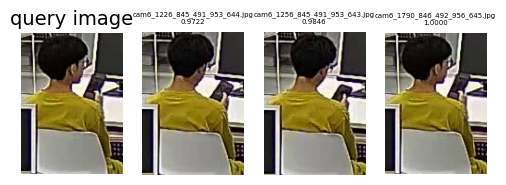

In [54]:
# 将query_img和topN张图片显示出来
fig, axes = plt.subplots(1, cols + 1, figsize = (2 * cols, 3)) # 2行，topN+1列
query_img_data = np.array(Image.open(query_img).convert('RGB')) # PIL读取图片，转换为RGB，resize为(64, 128)
plt.clf()
ax = fig.add_subplot(1, cols + 1, 1) # 第一张图
ax.imshow(query_img_data) # 显示图片
ax.set_title('query image', fontsize=14)
ax.axis("off")

# 遍历显示topN张图片
for i in range(cols):
    ax = fig.add_subplot(1, cols + 1, i + 2)
    gallery_index = I[i]
    gallery_img = cv2.imread(imgs[gallery_index])[:, :, ::-1]
    ax.imshow(gallery_img)
    # set title: filename + similarity
    ax.set_title(f"{os.path.basename(imgs[gallery_index])}\n{D[i]:.4f}", fontsize=5)
    ax.axis("off")
    